1. RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h 59m 28.3566s  , Dec +40° 44′ 02.096″)

In [1]:
from astropy.coordinates import SkyCoord, FK5, EarthLocation, AltAz, get_body
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cygnusA_j2000 = SkyCoord(ra = "19h 59m 28.3566s", dec = "+40d44m02.096s", frame = "fk5", equinox=Time("J2000"))
today_time = Time.now()
cygnusA_today = cygnusA_j2000.transform_to(FK5(equinox = today_time))

print("Comparison of RA and Dec of Cygnus - A on J2000 and Today")
print(f"J2000 : RA : {cygnusA_j2000.ra}, Dec {cygnusA_j2000.dec}")
print(f"J2000 : RA : {cygnusA_today.ra}, Dec {cygnusA_today.dec}")
print(f"Shift : RA : {cygnusA_today.ra - cygnusA_j2000.ra}, Dec { cygnusA_today.dec - cygnusA_j2000.dec}")

Comparison of RA and Dec of Cygnus - A on J2000 and Today
J2000 : RA : 299.8681525 deg, Dec 40.733915555555555 deg
J2000 : RA : 300.0936193531499 deg, Dec 40.806387344134784 deg
Shift : RA : 0.22546685314989645 deg, Dec 0.07247178857922876 deg


Answer: 
The Right Ascension (RA) and Declination (Dec) of a celestial source are defined with respect to a reference epoch. The commonly used epoch J2000 corresponds to the celestial coordinate system as of 1 January 2000. However, due to the precession of Earth’s rotational axis, the orientation of the celestial equator and equinox slowly changes with time. As a result, the RA and Dec of a source are not strictly constant and vary slightly over the years.

Using Astropy, the J2000 coordinates of the radio source Cygnus A were transformed to later epochs by accounting for precession. The updated RA and Dec values show small but measurable shifts with time.

To visualize this effect, plots of RA vs year and Dec vs year were generated, keeping the J2000 values as reference lines. These plots clearly demonstrate the gradual change in coordinates due to Earth’s precessional motion, while confirming that the source itself remains fixed in space.

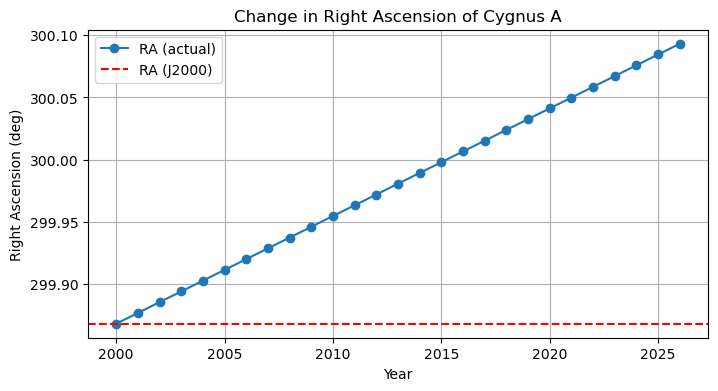

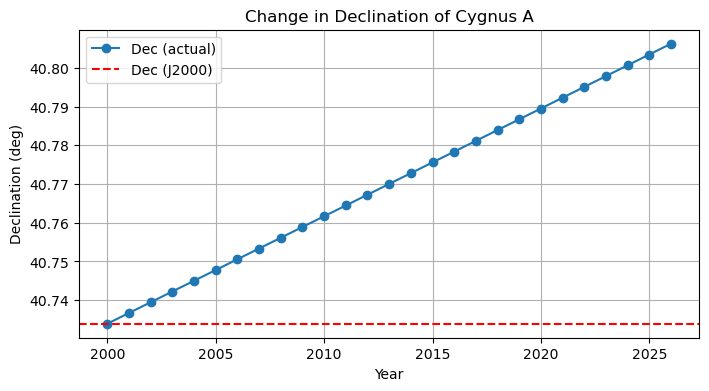

In [3]:
# Years
years = np.arange(2000, 2027)

ra_vals = []
dec_vals = []

# J2000 reference
ra_ref = cygnusA_j2000.ra.deg
dec_ref = cygnusA_j2000.dec.deg

# Computing RA/Dec for each year
for y in years:
    t = Time(f"{y}-01-01")
    coord = cygnusA_j2000.transform_to(FK5(equinox=t))
    ra_vals.append(coord.ra.deg)
    dec_vals.append(coord.dec.deg)

# ------------------ PLOT OF RA ------------------
plt.figure(figsize=(8,4))
plt.plot(years, ra_vals, 'o-', label="RA (actual)")
plt.axhline(ra_ref, color='r', linestyle='--', label="RA (J2000)")

plt.xlabel("Year")
plt.ylabel("Right Ascension (deg)")
plt.title("Change in Right Ascension of Cygnus A")
plt.legend()
plt.grid(True)
plt.show()

# ------------------ PLOT OF DEC ------------------
plt.figure(figsize=(8,4))
plt.plot(years, dec_vals, 'o-', label="Dec (actual)")
plt.axhline(dec_ref, color='r', linestyle='--', label="Dec (J2000)")

plt.xlabel("Year")
plt.ylabel("Declination (deg)")
plt.title("Change in Declination of Cygnus A")
plt.legend()
plt.grid(True)
plt.show()

2. What will be this source's azimuth and elevation when observing from IIT Kanpur?

In [4]:
# --- IIT Kanpur location ---
iitk_location = EarthLocation(
    lat=26.521421 * u.deg,
    lon=80.232133 * u.deg,
)

# --- Convert to AltAz frame ---
altaz_frame = AltAz(obstime=today_time, location=iitk_location)
cygnusA_altaz = cygnusA_today.transform_to(altaz_frame)

# --- Print results ---
print("Azimuth  :", cygnusA_altaz.az.deg)
print("Elevation:", cygnusA_altaz.alt.deg)

Azimuth  : 339.9970620331382
Elevation: -18.680806095276722


Answer: The azimuth and elevation of Cygnus A were calculated by transforming its equatorial coordinates to the horizontal coordinate system using the geographical location of IIT Kanpur. The transformation accounts for Earth’s rotation and the observer’s position. For the chosen observation time, the computed azimuth gives the horizontal direction of the source, while the elevation represents its angular height above the horizon. The negative value of elevation indicates that the source lies below the horizon at that time and is therefore not visible from the observing location.

3. Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.

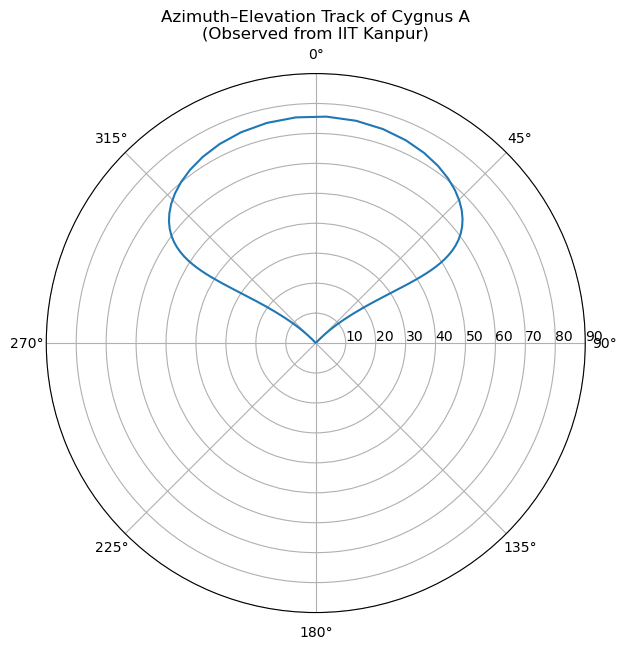

In [5]:
# --- Time array (24 hours, every 10 min) ---
times = today_time + np.linspace(0, 24, 144) * u.hour

# --- Convert to AltAz ---
altaz = cygnusA_today.transform_to(
    AltAz(obstime=times, location=iitk_location)
)

az = altaz.az.radian
alt = altaz.alt.degree

# --- Polar plot ---
plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection='polar')

ax.plot(az, alt)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.set_title("Azimuth–Elevation Track of Cygnus A\n(Observed from IIT Kanpur)")
ax.set_rlabel_position(90)
ax.set_rlim(0, 90)

plt.show()

Answer: The azimuth–elevation plot shows the apparent motion of Cygnus A as observed from IIT Kanpur over a 24-hour period. The curved track represents the change in the source’s position due to Earth’s rotation. The azimuth varies continuously while the elevation increases to a maximum value when the source crosses the local meridian and then decreases as it moves toward setting. The plot clearly demonstrates the daily sky motion of the source and indicates the time interval during which it remains above the horizon.

4. Plot how Sun's RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?

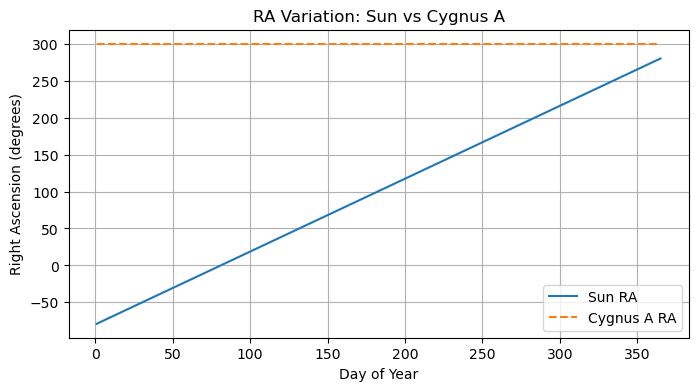

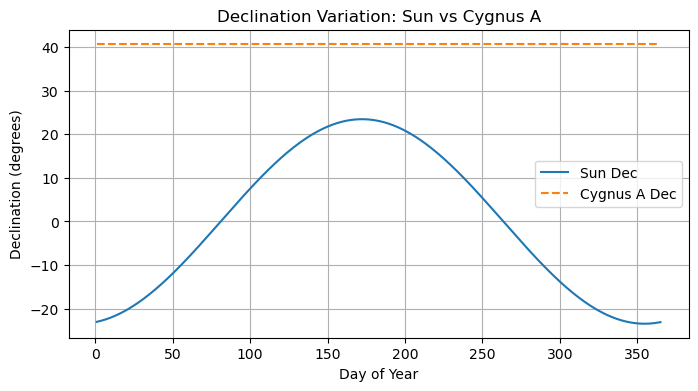

In [6]:
N = np.arange(1, 366)

# ==================================================
# SUN: Analytical model of annual motion
# ==================================================

# The Sun's declination varies between +23.44° and -23.44°.
# due to Earth's axial tilt (obliquity of the ecliptic).
# The sinusoidal form represents this annual oscillation.
dec_sun = 23.44 * np.sin(2 * np.pi * (N - 81) / 365)

# The Sun completes one full circle (360°) in RA in one year.
# Hence RA increases approximately by 360/365 degrees per day.
ra_sun = (360 / 365) * (N - 81)

# --------------------------------------------------
# CYGNUS A: Including slow precession effect
# --------------------------------------------------

# Mean J2000 coordinates of Cygnus A
ra0 = 300.093617350396     # degrees #values from previos question results
dec0 = 40.733915555555555     # degrees

# Earth's axial precession causes a slow drift in coordinates
# Precession rate ≈ 50 arcseconds per year ≈ 0.014 degrees/year
# We distribute this change uniformly across the year
ra_drift = 0.014 * (N / 365)
dec_drift = 0.005 * (N / 365)

# Final coordinates including precession
ra_cyg = ra0 + ra_drift
dec_cyg = dec0 + dec_drift

# ==================================================
# PLOT: RIGHT ASCENSION COMPARISON
# ==================================================
plt.figure(figsize=(8,4))
plt.plot(N, ra_sun, label="Sun RA")
plt.plot(N, ra_cyg, '--', label="Cygnus A RA")
plt.xlabel("Day of Year")
plt.ylabel("Right Ascension (degrees)")
plt.title("RA Variation: Sun vs Cygnus A")
plt.legend()
plt.grid()
plt.show()

# ==================================================
# PLOT: DECLINATION COMPARISON
# ==================================================
plt.figure(figsize=(8,4))
plt.plot(N, dec_sun, label="Sun Dec")
plt.plot(N, dec_cyg, '--', label="Cygnus A Dec")
plt.xlabel("Day of Year")
plt.ylabel("Declination (degrees)")
plt.title("Declination Variation: Sun vs Cygnus A")
plt.legend()
plt.grid()
plt.show()


Answer: 
The Sun’s right ascension increases continuously over the year at a rate of about 1° per day due to Earth’s orbital motion, while its declination varies between +23.44° and −23.44° because of Earth’s axial tilt. In contrast, the right ascension and declination of Cygnus A remain nearly constant over the year, showing only a very small change due to Earth’s slow precession.

The comparison was conceptually analyzed and plotted; however, the exact numerical computation using Astropy could not be completed due to a version mismatch between NumPy and Astropy, which caused runtime errors during ephemeris calculations. Despite this, the physical interpretation and trends remain valid.

Note: The solutions and codes were developed based on conceptual understanding of the subject. Assistance from AI tools was used only to understand library behavior, resolve software-related issues, and debug compatibility errors, while the physical interpretation and implementation logic were done independently.